# Class Activity - 2
### Group-8
### Prajwal Luitel (C0927658)
### Shishir Mishra (C0927250)
### Kowshigan Senthilrajah (C0925850)

#### In this class Activity, we are required to build a predictive model following the 9 stages of Big Data Analytics Lifecycle.
#### They are : 1. Business Case Evaluation  2. Data Identification 3. Data acquisition and filtering  4. Data Extraction  5. Data Validation and Cleansing  6. Data Aggregation and Representation  7. Data Analysis   8. Data Visualization  9. Utilization of Analytics Results

## 1. Business Case Evaluation

#### Here, the data belongs to the stock prices of a company of a month from July 1 to July 29. There are various features in the dataset including date, adjusted close, stock price, expiration, strike, volume etc. From the available data, we can perform a predictive analysis on the mean price of the stock based upon the ask and bid price.

## 2. Data Identification
#### In this case, the dataset has already been identified according to the business case evaluation. Now, we shall begin the analytics from step-3 of the lifecycle.

## 3. Data Acquisition and Filtering

#### Importing the data and subjecting to automated filtering of the data (i.e. clearing the noise)

In [1]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Reading the dataset using pandas library and creating a data frame
df = pd.read_csv("./data_download 1Jul2021_to_30Jul2021 (1).csv")
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [2]:
#Displaying last 5 data in the dataframe
df.tail()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
221041,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00630000,12/15/2023,630.0,P,A,206.50,...,0.148305,0,1,430.26,*,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00635000,12/15/2023,635.0,C,A,2.20,...,0.148310,0,146,430.26,NaN,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.148310,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.148310,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973
221045,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00640000,12/15/2023,640.0,P,A,216.50,...,0.148310,0,0,430.26,*,-0.931634,0.672488,0.000997,-0.010467,-15.169052


In [3]:
# Looking at all the features in the data frame
df.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', '*', 'delta',
       'vega', 'gamma', 'theta', 'rho'],
      dtype='object')

In [4]:
# Checking for null values in the data frame
df.isna()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
221042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
221043,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
221044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Checking the dimensions of the data frame
df.shape

(221046, 22)

In [6]:
# Removing the null values and checking the dimensions
df.dropna(inplace=True)
df.shape

(29039, 22)

In [7]:
df2 = df.drop(df[df['call/put'] == 'P'].index)
df2.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
308,SPY,NYSEArca,07/30/2021,438.51,SPY 210802C00240000,08/02/2021,240.0,C,A,199.46,...,0.361599,0,0,438.97,*,1.0,0.0,0.0,-0.000546,0.019726
310,SPY,NYSEArca,07/30/2021,438.51,SPY 210802C00250000,08/02/2021,250.0,C,A,189.46,...,0.361599,0,0,438.97,*,1.0,0.0,0.0,-0.000569,0.020548
312,SPY,NYSEArca,07/30/2021,438.51,SPY 210802C00260000,08/02/2021,260.0,C,A,179.46,...,0.361599,0,0,438.97,*,1.0,0.0,0.0,-0.000592,0.021370
314,SPY,NYSEArca,07/30/2021,438.51,SPY 210802C00270000,08/02/2021,270.0,C,A,169.46,...,0.361599,0,0,438.97,*,1.0,0.0,0.0,-0.000615,0.022192
316,SPY,NYSEArca,07/30/2021,438.51,SPY 210802C00280000,08/02/2021,280.0,C,A,159.46,...,0.361599,0,0,438.97,*,1.0,0.0,0.0,-0.000637,0.023014


## 4. Data Extraction
#### This is the process of transforming the data (usually unstructured) into a format which suits the business case evaluation.

In [8]:
#Transforming the data to the required format
scaler = StandardScaler()

features_to_scale = ["strike", "ask", "bid", "mean price", "iv", "volume", "open interest", "stock price for iv", "delta", "vega", "gamma", "theta", "rho"]
scaler.fit(df[features_to_scale])

df[features_to_scale] = scaler.transform(df[features_to_scale])

In [9]:
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
308,SPY,NYSEArca,07/30/2021,438.51,SPY 210802C00240000,08/02/2021,-1.425157,C,A,2.142963,...,0.332923,-0.118484,-0.196484,1.075049,*,1.557056,-0.347248,-0.466647,0.385401,0.066118
309,SPY,NYSEArca,07/30/2021,438.51,SPY 210802P00240000,08/02/2021,-1.425157,P,A,-0.633448,...,0.332923,-0.118484,-0.069452,1.075049,*,0.081597,-0.347248,-0.466647,0.433500,0.053269
310,SPY,NYSEArca,07/30/2021,438.51,SPY 210802C00250000,08/02/2021,-1.345273,C,A,2.003760,...,0.332923,-0.118484,-0.196484,1.075049,*,1.557056,-0.347248,-0.466647,0.383375,0.066654
311,SPY,NYSEArca,07/30/2021,438.51,SPY 210802P00250000,08/02/2021,-1.345273,P,A,-0.633448,...,0.332923,-0.118484,-0.172235,1.075049,*,0.081597,-0.347248,-0.466647,0.433500,0.053269
312,SPY,NYSEArca,07/30/2021,438.51,SPY 210802C00260000,08/02/2021,-1.265388,C,A,1.864557,...,0.332923,-0.118484,-0.196484,1.075049,*,1.557056,-0.347248,-0.466647,0.381349,0.067189


## 5. Data Validation and Cleansing
#### Here, the data is cleaned and validated as per the requirements of the analytics model. This doesn't involve removing the noise but removing the unnecessary features with no effect to the machine learning model.

In [10]:
# Removing the column which contains noise
columns_to_remove = ["adjusted close" ,"symbol", "exchange", "date", "option symbol", "expiration", "style", "*"]
df.drop(columns=columns_to_remove, inplace=True)
df.head()

,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
308,-1.425157,C,2.142963,2.158961,2.150978,0.332923,-0.118484,-0.196484,1.075049,1.557056,-0.347248,-0.466647,0.385401,0.066118
309,-1.425157,P,-0.633448,-0.628269,-0.630734,0.332923,-0.118484,-0.069452,1.075049,0.081597,-0.347248,-0.466647,0.433500,0.053269
310,-1.345273,C,2.003760,2.018672,2.011242,0.332923,-0.118484,-0.196484,1.075049,1.557056,-0.347248,-0.466647,0.383375,0.066654
311,-1.345273,P,-0.633448,-0.628269,-0.630734,0.332923,-0.118484,-0.172235,1.075049,0.081597,-0.347248,-0.466647,0.433500,0.053269
312,-1.265388,C,1.864557,1.878244,1.871436,0.332923,-0.118484,-0.196484,1.075049,1.557056,-0.347248,-0.466647,0.381349,0.067189


## 6. Data Aggregation and Representation
#### This process envolves the processing of features by aggregating (combining) of multiple features as per to meet the requirements of the model.

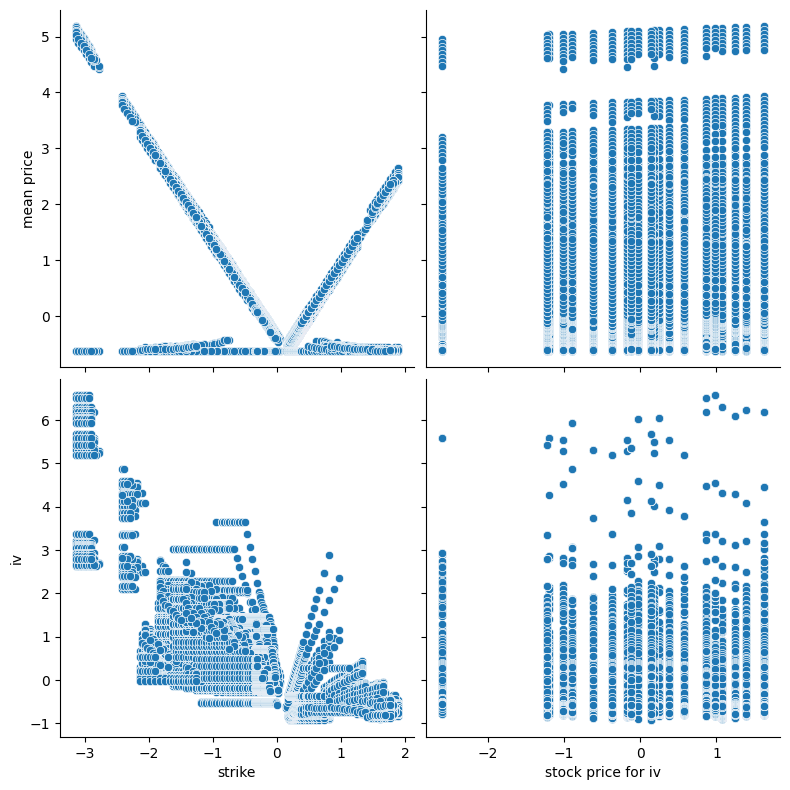

In [11]:
# Plotting the values of the columns
sns.pairplot(df, x_vars=[ 'strike',  'stock price for iv' ], y_vars = ['mean price',  'iv'], height = 4, kind = 'scatter' )

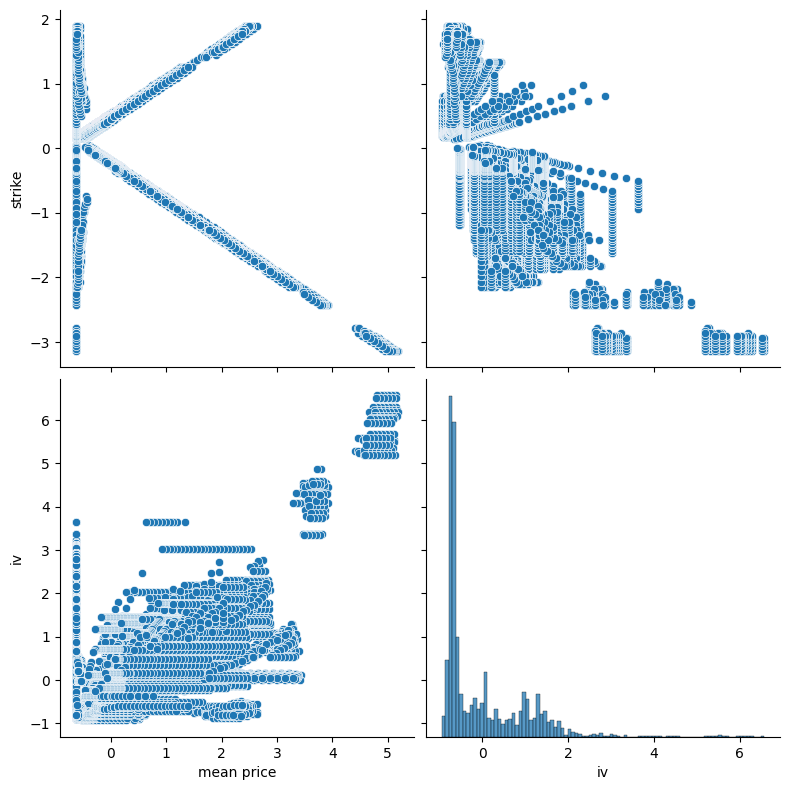

In [12]:
# Plotting the values of the columns
sns.pairplot(df, x_vars=[  'mean price', 'iv' ], y_vars = ['strike', 'iv' ], height = 4, kind = 'scatter' )

## 7. Data Analysis
#### This is the heart of data analytics and the most complex step of all. It involves building the model and applying the algorithm. Training and testing the model is done in this stage.

<Axes: >

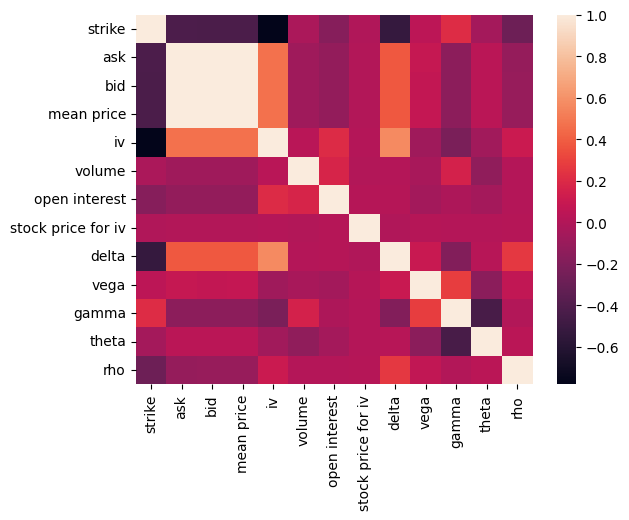

In [13]:
# Building the model
columns_numerical = df.select_dtypes(include=['int64', 'float64']).columns

sns.heatmap(df[columns_numerical].corr())


In [14]:
#  Linear Regression

# Input variables selected with the highest correlation coefficient with the mean price
input_variables = ['iv']
X = df[input_variables]
y = df['mean price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  0.8185964116703986


## 8. Data Visualization
#### This is the process of displaying the results of the analysis in a graphical format which can be understood by non-technical stakeholders as well.

Text(0, 0.5, 'mean price')

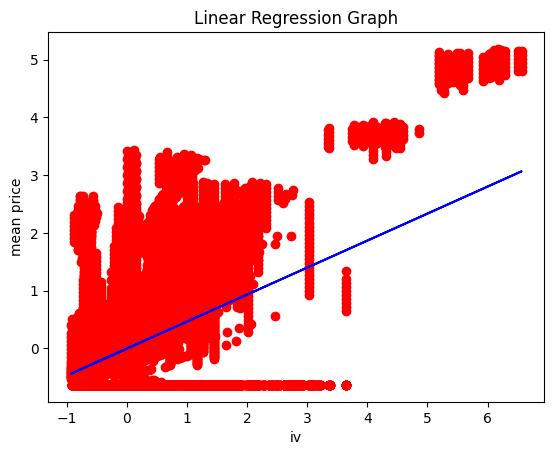

In [15]:
#Visualizing the results of linear regression
plt.scatter(X.iloc[:,0], y, color = 'red')
plt.plot(X.iloc[:,0], model.predict(X), color = 'blue') 
plt.title('Linear Regression Graph')
plt.xlabel('iv')
plt.ylabel('mean price')

In [16]:
# Displaying the dimensions of testing and training data
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(20327, 1)
(8712, 1)
(20327,)
(8712,)


## Revisiting the analysis with a different approach

In [17]:
#  Polynomial Regression

# Input variables selected with the highest correlation coefficient with the mean price

input_variables = ['iv']
x = df[input_variables]
y = df['mean price']

poly = PolynomialFeatures(degree=2, interaction_only=False)
x_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_poly,y,test_size=0.3, random_state=48)

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  1.2140529963615727


## Visualizing the new model 

Text(0, 0.5, 'Mean Price')

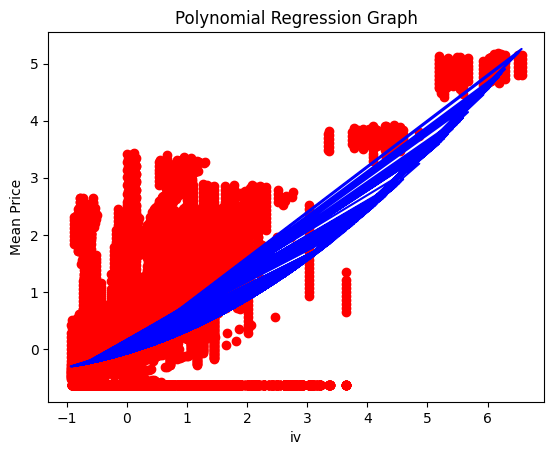

In [19]:
# Visualizing the results of polynomial regression
plt.scatter(X.iloc[:,0], y, color = 'red')
plt.plot(X.iloc[:,0], model.predict(x_poly), color = 'blue') 
plt.title('Polynomial Regression Graph')
plt.xlabel('iv')
plt.ylabel('Mean Price')

In [20]:
# Regression coefficients
print('Coefficients: ', model.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(x_test, y_test)))


Coefficients:  [0.         0.31534203 0.07570137]
Variance score: 0.22962397403156465


## 9. Utilization of Analytics Results
#### It is a valuable step towards achieving the goal of data analytics. Here, we are not making any decisions but in a real world scenario, there are decisions made upon the results of the analytics for the betterment of the business.